# Creación de manchas

Vamos a crear multiples figuras de manchas, las cuales seran de tres tipos:
- Elipses
- Lineas
- Poligonos

Ejecutamos el siguente código

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import random
import matplotlib.pyplot as plt

CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('data')
DATA_manchas = DATA_DIR.joinpath('defectos')

El tamaño de las manchas que crearemos será de 200 px por 200 px, estos los pondremos posteriormente sobre las imagenes. 

In [2]:
import manchas
width, height = 200, 200

A continuación mostraremos el tipo de manchas que se generán

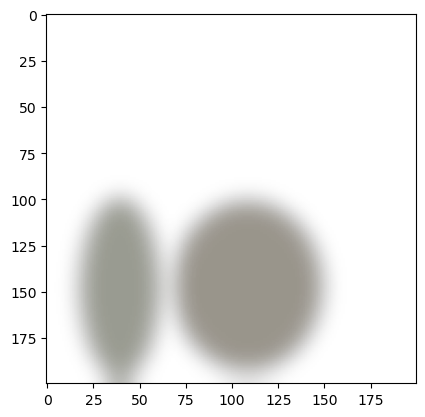

In [3]:
generator = manchas.CoffeeStainImageGenerator(width, height,'ellipse', num_stains=2)
plt.imshow(generator.image)
plt.show()

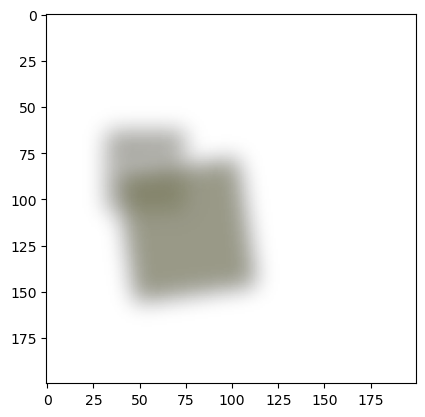

In [4]:
generator = manchas.CoffeeStainImageGenerator(width, height,'line', num_stains=2)
plt.imshow(generator.image)
plt.show()

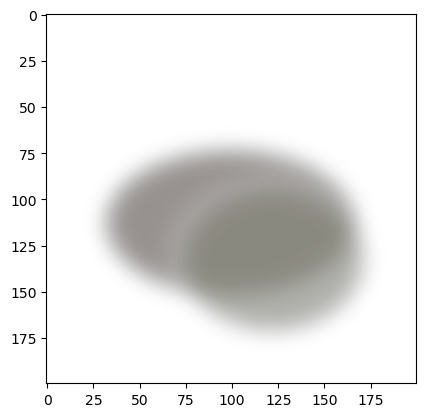

In [5]:
generator = manchas.CoffeeStainImageGenerator(width, height,'mix', num_stains=2)
plt.imshow(generator.image)

A cada imagen le agregaremos varias de estas manchas. Vamos a generar 150 tipos de manchas diferntes

In [6]:
for i in range(150):
    generator = manchas.CoffeeStainImageGenerator(width, height,'ellipse', num_stains=2)
    generator.image.save(DATA_manchas.joinpath('ellipse_'+str(i)+'.png'))
    
for i in range(150):
    generator = manchas.CoffeeStainImageGenerator(width, height,'line', num_stains=2)
    generator.image.save(DATA_manchas.joinpath('line_'+str(i)+'.png'))
    
for i in range(150):
    generator = manchas.CoffeeStainImageGenerator(width, height,'mix', num_stains=2)
    generator.image.save(DATA_manchas.joinpath('mix_'+str(i)+'.png'))

Vamos agregar estos defectos de forma aleatoria a las imagenes

In [3]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

files = sorted([f for f in DATA_DIR.joinpath('Process','Red','manchas').iterdir() if f.is_file()])
manchas_lista = sorted([f for f in DATA_manchas.iterdir() if f.is_file()])

In [4]:
for file in files:
    imagenss= manchas.hacer_manchas(10,file,manchas_lista)
    imagenss.save(str(file))

Obteniendo resultados como los siguentes:

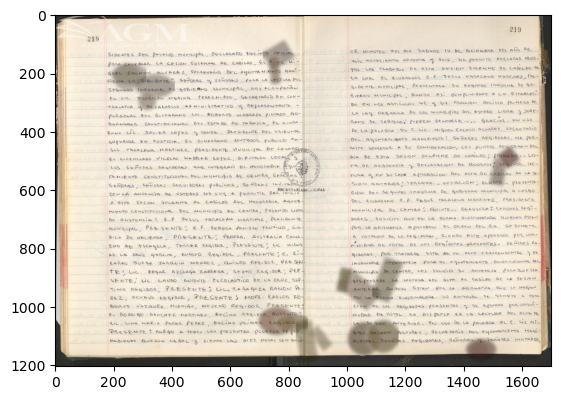

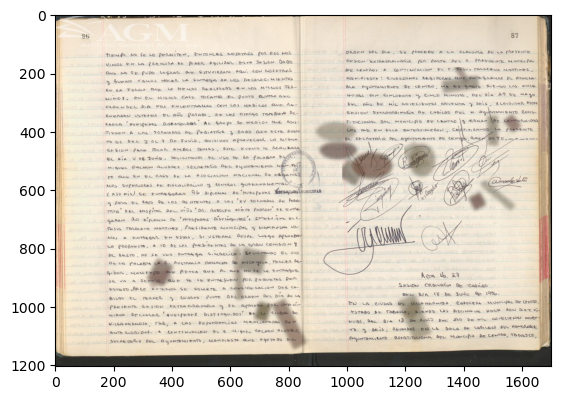

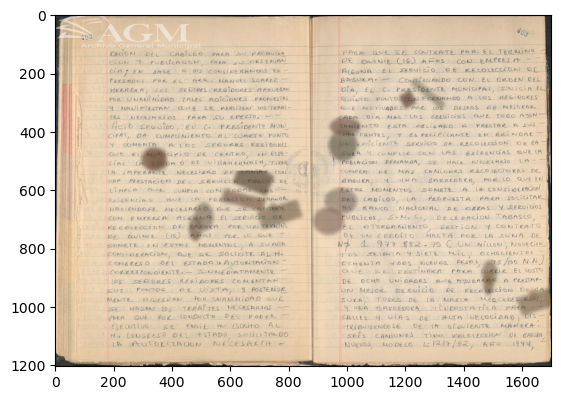

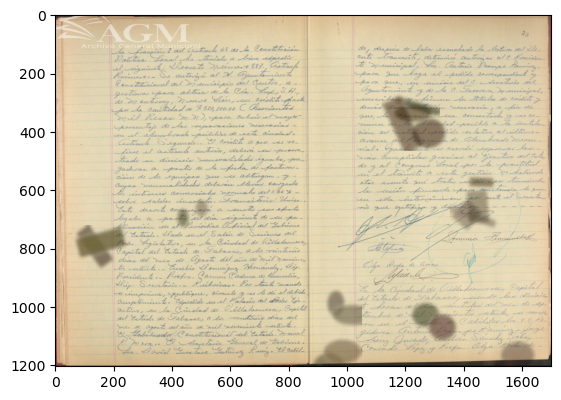

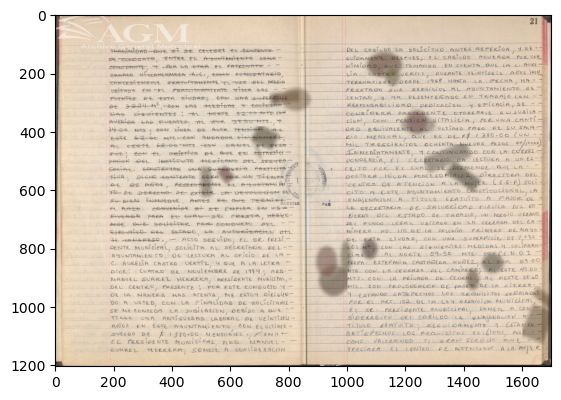

In [7]:
for i in range(5):
    file = str(random.choice(files))
    imagen = Image.open(file)
    plt.imshow(imagen)
    plt.show()